Shape: (259, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2023-04-20  166.169998  169.699997  160.559998  162.990005  162.990005   
1  2023-04-21  164.800003  166.000000  161.320007  165.080002  165.080002   
2  2023-04-24  164.649994  165.649994  158.610001  162.550003  162.550003   
3  2023-04-25  159.820007  163.470001  158.750000  160.669998  160.669998   
4  2023-04-26  160.289993  160.669998  153.139999  153.750000  153.750000   

      Volume  
0  210970800  
1  123539000  
2  140006600  
3  121999300  
4  153364100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       259 non-null    object 
 1   Open       259 non-null    float64
 2   High       259 non-null    float64
 3   Low        259 non-null    float64
 4   Close      259 non-null    float64
 5   Adj Close  259 non-null    float64
 6   Vo

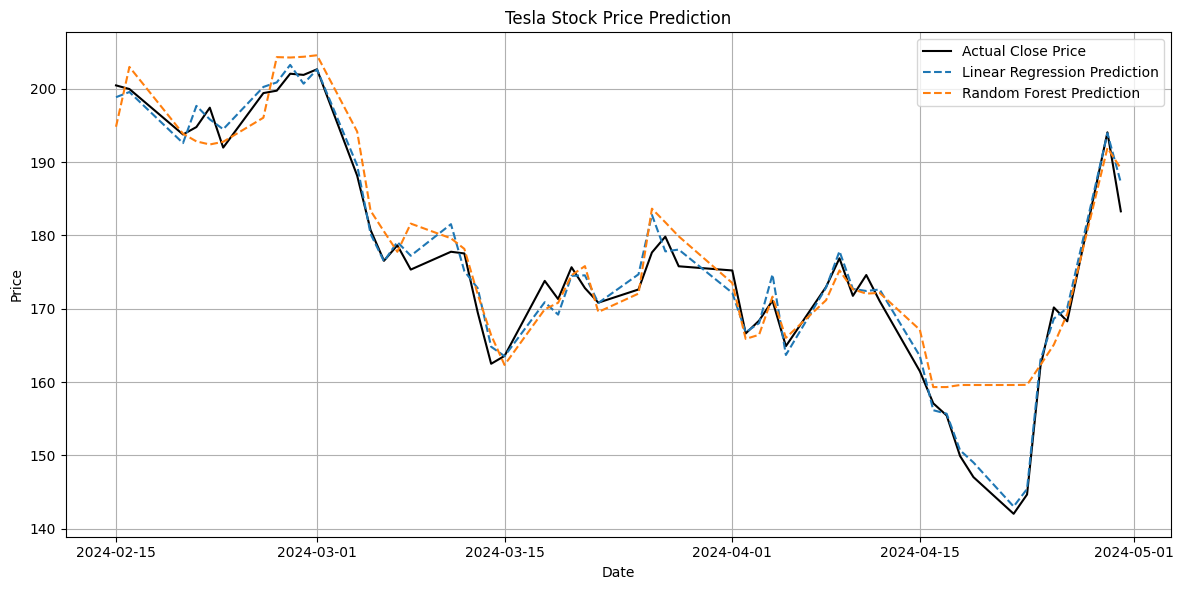

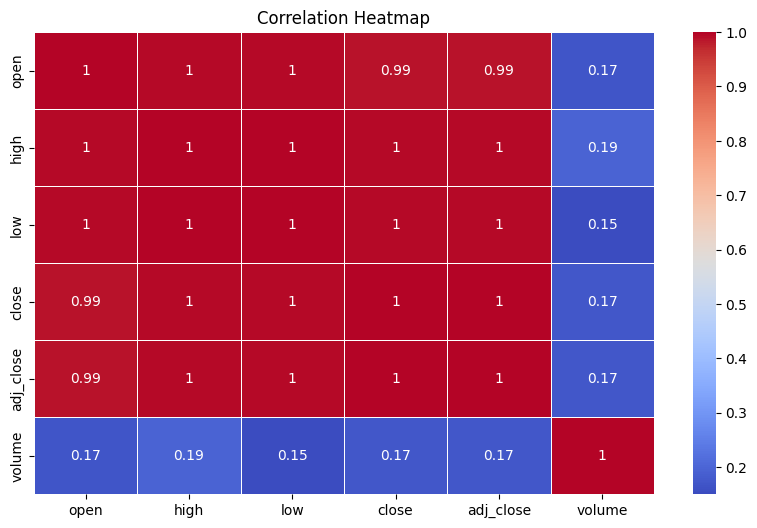

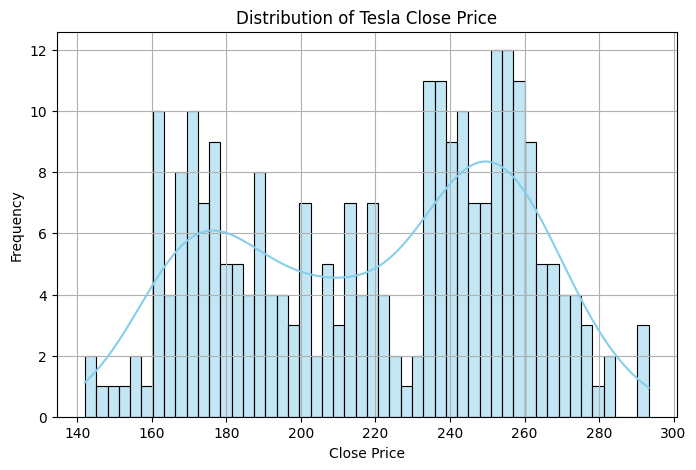

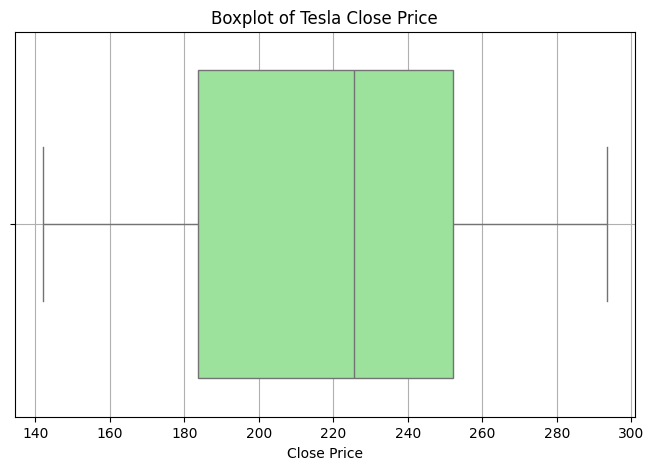

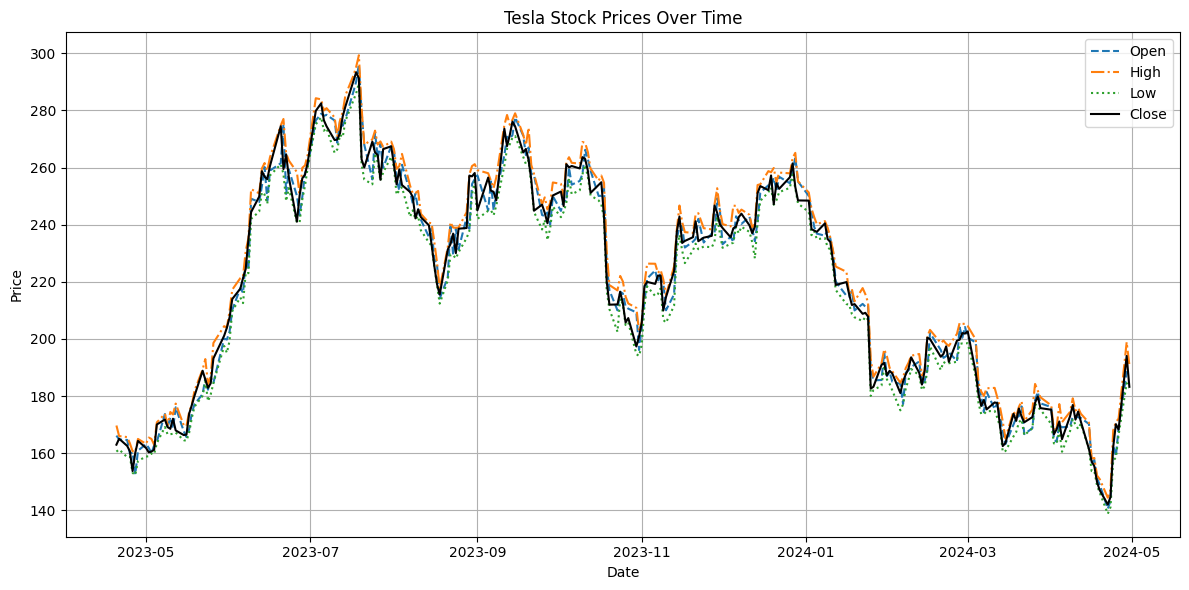

<ipython-input-7-e9a7a0c7541f>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


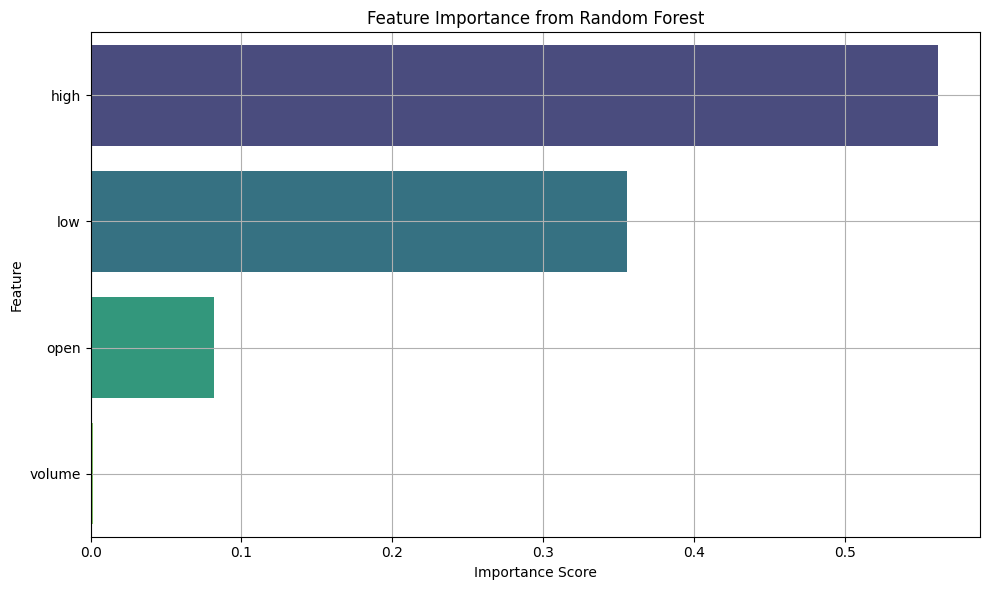

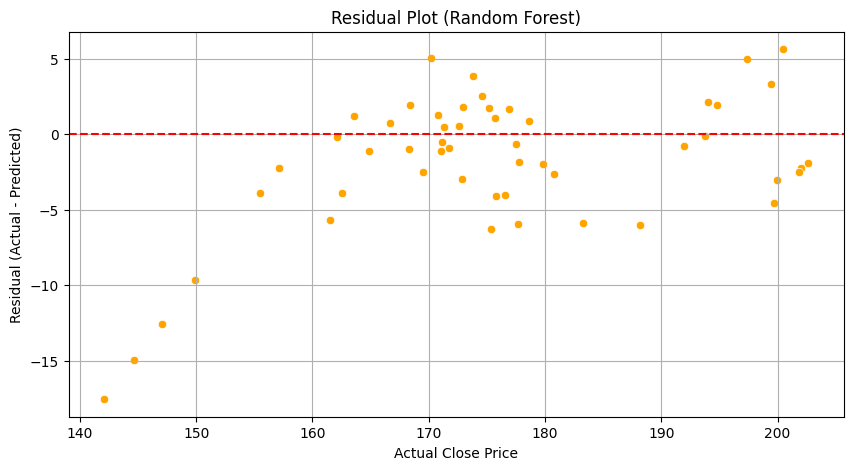

Final Data Shape: (259, 7)
        date        open        high         low       close   adj_close  \
0 2023-04-20  166.169998  169.699997  160.559998  162.990005  162.990005   
1 2023-04-21  164.800003  166.000000  161.320007  165.080002  165.080002   
2 2023-04-24  164.649994  165.649994  158.610001  162.550003  162.550003   
3 2023-04-25  159.820007  163.470001  158.750000  160.669998  160.669998   
4 2023-04-26  160.289993  160.669998  153.139999  153.750000  153.750000   

      volume  
0  210970800  
1  123539000  
2  140006600  
3  121999300  
4  153364100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       259 non-null    datetime64[ns]
 1   open       259 non-null    float64       
 2   high       259 non-null    float64       
 3   low        259 non-null    float64       
 4   close      259 non-null    float64 

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv('/content/Tesla (20.04.23 - 01.05.24).csv')

# Step 3: Inspect Dataset
print("Shape:", df.shape)
print(df.head())
print(df.info())

# Step 4: Preprocessing
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.dropna(inplace=True)

# Step 5: Feature Engineering
features = ['open', 'high', 'low', 'volume']
target = 'close'
X = df[features]
y = df[target]

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Step 8: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Step 9: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Step 10: Prediction Comparison Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[-len(y_test):], y_test.values, label='Actual Close Price', color='black')
plt.plot(df['date'].iloc[-len(y_test):], lr_preds, label='Linear Regression Prediction', linestyle='--')
plt.plot(df['date'].iloc[-len(y_test):], rf_preds, label='Random Forest Prediction', linestyle='--')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ EXTRA VISUALIZATIONS ------------------

# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Distribution Plot of Close Price
plt.figure(figsize=(8, 5))
sns.histplot(df['close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tesla Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Boxplot for Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['close'], color='lightgreen')
plt.title('Boxplot of Tesla Close Price')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()

# 4. Line Plot of All Price Features
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['open'], label='Open', linestyle='--')
plt.plot(df['date'], df['high'], label='High', linestyle='-.')
plt.plot(df['date'], df['low'], label='Low', linestyle=':')
plt.plot(df['date'], df['close'], label='Close', color='black')
plt.title('Tesla Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Feature Importance (Random Forest)
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Residual Plot
residuals = y_test - rf_preds

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=residuals, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Close Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()

# Final Info Check
print("Final Data Shape:", df.shape)
print(df.head())
print(df.info())
